<a href="https://colab.research.google.com/github/muhammadahmad62/ML_Labs/blob/main/Lab05_293884_Muhammad_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

Task 5.1:

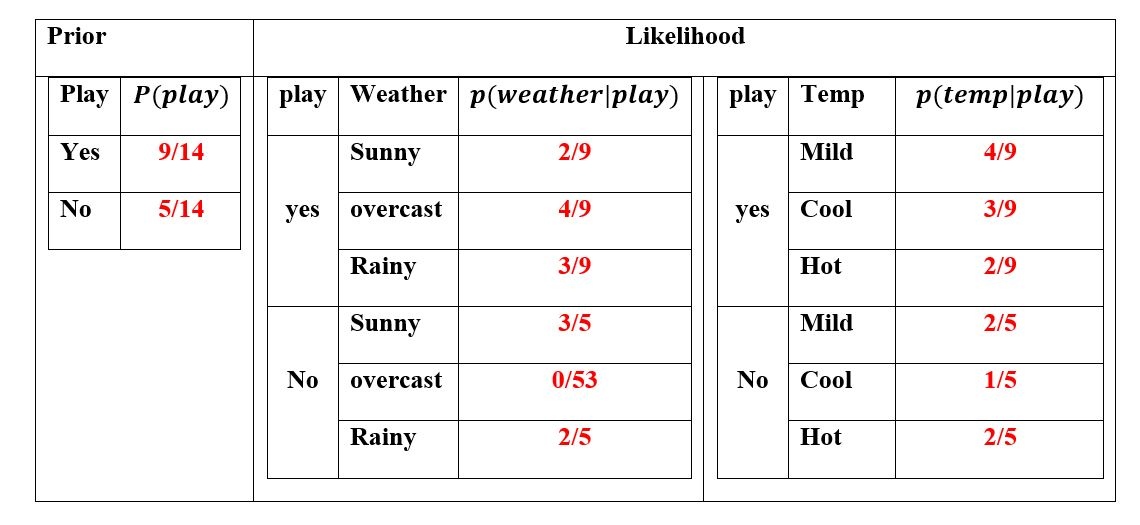

Task 5.2:

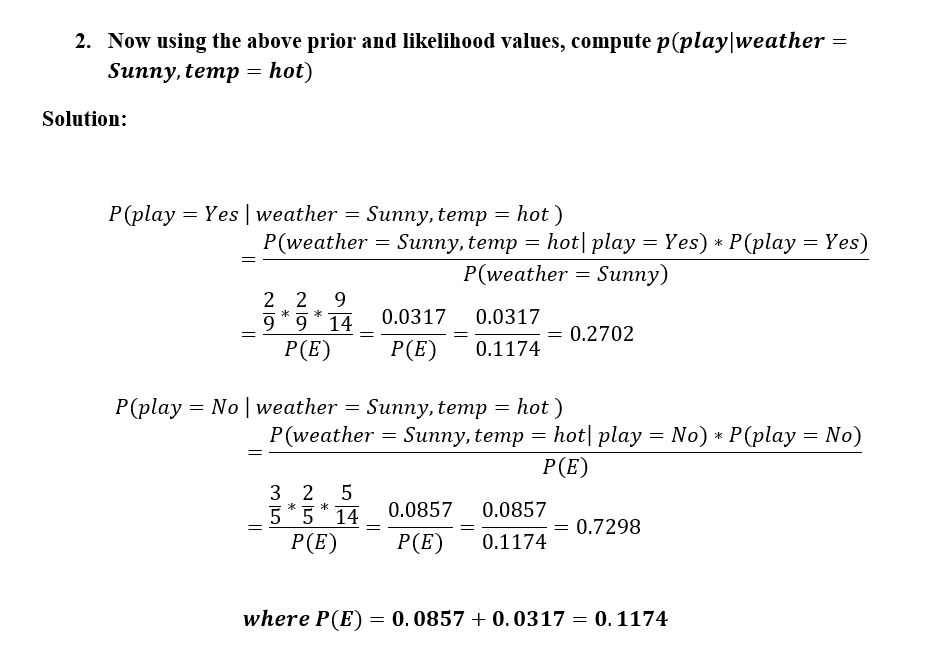

Task 5.3:

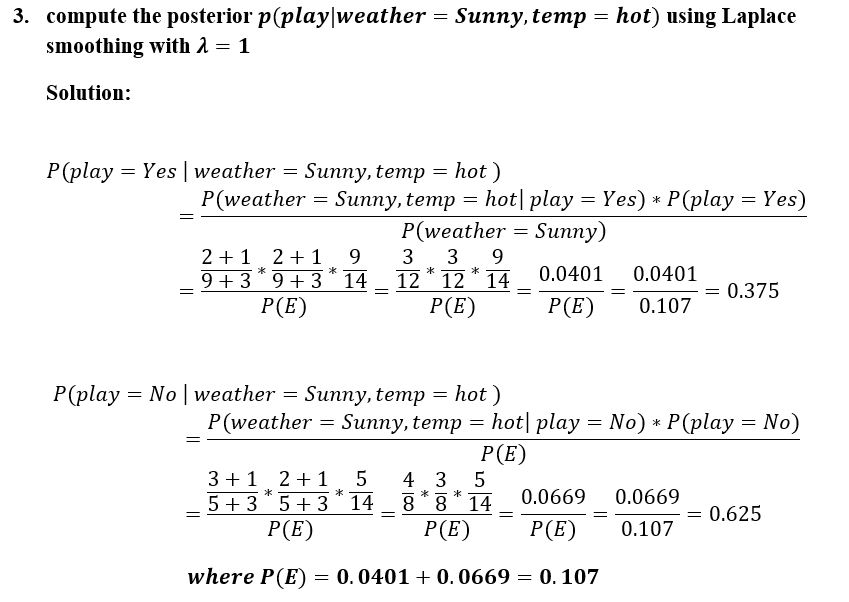

## Task 1.4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.naive_bayes import CategoricalNB

In [ ]:
data = {
    'weather': [
                'Sunny',
                'Sunny',
                'Overcast',
                'Rainy',
                'Rainy',
                'Rainy',
                'Overcast',
                'Sunny',
                'Sunny',
                'Rainy',
                'Sunny',
                'Overcast',
                'Overcast',
                'Rainy',
    ],
    'temperature': [
                    'Hot',
                    'Hot',
                    'Hot',
                    'Mild',
                    'Cool',
                    'Cool',
                    'Cool',
                    'Mild',
                    'Cool',
                    'Mild',
                    'Mild',
                    'Mild',
                    'Hot',
                    'Mild',
    ],
    'play': [
             'No',
             'No',
             'Yes',
             'Yes',
             'Yes',
             'No',
             'Yes',
             'No',
             'Yes',
             'Yes',
             'Yes',
             'Yes',
             'Yes',
             'No',
    ]
}

In [ ]:
dataset = pd.DataFrame(data)

# Select given and target data
x_data = dataset[['weather', 'temperature']]
y_data = dataset['play'].values

# Encode data
enc = OrdinalEncoder()
x_enc_data = enc.fit_transform(x_data)
y_enc_data = enc.fit_transform(y_data.reshape(-1, 1))

# Fit data with lamda = 1
model = CategoricalNB()
model = model.fit(x_enc_data, y_enc_data)

# Fit data with lambda = 0
model_no_alpha = CategoricalNB(alpha=0)
model_no_alpha = model_no_alpha.fit(x_enc_data, y_enc_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
# Predict probabilities where Weather = Sunny & Temperature = Hot
print(model.predict_proba([[2, 1]]))
print(model_no_alpha.predict_proba([[2, 1]]))

# The values obtained are same as those of the calculations in the above images.

[[0.625 0.375]]
[[0.72972973 0.27027027]]


# Task 2

CMS ID: 293884.

The selected dataset is: 84 % 21 = 0 .....   
[ **0_anlcatdata_bondrate.csv** ]

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.naive_bayes import CategoricalNB

from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Best alpha value for dataset:  48


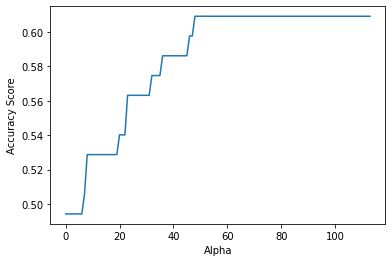

In [ ]:
dataset = pd.read_csv('/content/sample_data/0_analcatdata_bondrate.csv', sep=';')

x = dataset.filter(regex=("attr*"))
y = dataset['label'].values


enc = OrdinalEncoder()
x_enc = enc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_enc, y, test_size=0.2)

train_errors = []
test_errors = []
scores = []

for alpha in range(0, 114):
  model = CategoricalNB(alpha=alpha)

  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  train_errors.append(1 - accuracy_score(y_train, y_train_pred))
  test_errors.append(1 - accuracy_score(y_test, y_pred))

  scores.append(accuracy_score(y_test, y_pred))

plt.xlabel('Alpha')
plt.ylabel('Accuracy Score')
plt.plot(scores)

print('Best alpha value for dataset: ', scores.index(max(scores)))

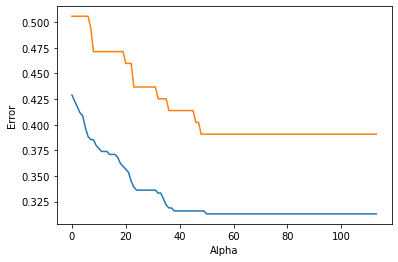

In [ ]:
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.plot(train_errors, label='train_error')
plt.plot(test_errors, label='test_error')

In [ ]:
print("")
print("Hence, at alpha = ",scores.index(max(scores)), "the accuracy score is the highest.")


Hence, at alpha =  48 the accuracy score is the highest.


# Task 3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

In [ ]:
dataset = load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
x = dataset['data']
y = dataset['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = GaussianNB()
model = model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

print('Accuracy score is: ', accuracy_score(y_test, y_pred))
print('<------------------------------------>')
print('Train Error: ', 1 - accuracy_score(y_train, y_train_pred))
print('Test Error : ', 1 - accuracy_score(y_test, y_pred))

Accuracy score is:  0.9649122807017544
<------------------------------------>
Train Error:  0.06593406593406592
Test Error :  0.03508771929824561


In [ ]:
print("")
print("Hence, accuracy score comes out to be: ", accuracy_score(y_test, y_pred))
print("The train and test errors are ", (1 - accuracy_score(y_train, y_train_pred)), "and ", (1 - accuracy_score(y_test, y_pred)), "respectively.")


Hence, accuracy score comes out to be:  0.9649122807017544
The train and test errors are  0.06593406593406592 and  0.03508771929824561 respectively.
